In [1]:
import matplotlib.pyplot as plt
import numpy as np

def pad_accuracies(accuracies):
    max_len = max(len(task) for task in accuracies)
    padded_accuracies = [task + [None] * (max_len - len(task)) for task in accuracies]
    return np.array(padded_accuracies, dtype=np.float32)

def plot_task_accuracies_roundwise(sgd_accuracies, bgd_accuracies):
 
    sgd_accuracies = pad_accuracies(sgd_accuracies)
    bgd_accuracies = pad_accuracies(bgd_accuracies)
    
    plt.figure(figsize=(10, 6))

    colors = plt.cm.Set1(np.linspace(0, 1, sgd_accuracies.shape[1]))
    for i in range(0, sgd_accuracies.shape[1], 2): # 0 - 9
        # print(f'sgd_accuracies : {sgd_accuracies[:, i]}')
        task_accuracies_over_rounds = sgd_accuracies[:, i]
        # print(task_accuracies_over_rounds)
        plt.plot(range(1, sgd_accuracies.shape[0] + 1), task_accuracies_over_rounds, marker='o', linestyle='--', color=colors[i], label=f'SGD Task {i+1}')

   
    for i in range(0, bgd_accuracies.shape[1], 2):
        #print(f'bgd_accuracies : {bgd_accuracies[:, i]}')
        plt.plot(range(1, bgd_accuracies.shape[0] + 1), bgd_accuracies[:, i], marker='s', color=colors[i], label=f'BGD Task {i+1}')
    
    plt.title(f'Task Accuracies Round-wise for SGD and BGD with FedAvg BGD')
    plt.xlabel('Rounds')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [2]:

def plot_average_accuracies_over_rounds(sgd_accuracies, bgd_accuracies):
    plt.figure(figsize=(10, 6))
    tasks = range(0, len(sgd_accuracies))
    
    sgd_means = [np.mean(np.array(task_accs)) for task_accs in sgd_accuracies]
    print(f"sgd_means: {sgd_means}")
    plt.plot(tasks, sgd_means, marker='o', label='SGD')
    
    bgd_means = [np.mean(np.array(task_accs)) for task_accs in bgd_accuracies]
    print(f"bgd_means: {bgd_means}")
    plt.plot(tasks, bgd_means, marker='s', label='BGD')
    
    plt.xlabel('Round')
    plt.ylabel('Accuracy')
    plt.title(f'Average Accuracies per round for SGD and BGD - FedAvg BGD ')
    plt.xticks(range(max(len(sgd_accuracies), len(bgd_accuracies))), [f'{i+1}' for i in range(max(len(sgd_accuracies), len(bgd_accuracies)))])
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [3]:
def calculate_forgetting(sgd_task_accuracies, bgd_task_accuracies):
    s = len(sgd_task_accuracies)

    print("sgd_avg_acc_after_last_task", round(np.mean(sgd_task_accuracies[s-1]), 2))
    print("bgd_avg_acc_after_last_task", round(np.mean(bgd_task_accuracies[s-1]), 2))

    sgd_forgetting = []
    for i in range(s-1):
        sgd_forgetting.append(sgd_task_accuracies[i][i]-sgd_task_accuracies[s-1][i])

    bgd_forgetting = []
    for i in range(s-1):
        bgd_forgetting.append(bgd_task_accuracies[i][i]-bgd_task_accuracies[s-1][i])

    return round(np.mean(sgd_forgetting),2), round(np.mean(bgd_forgetting), 2)

sgd_means: [32.025999999999996]
bgd_means: [96.212]


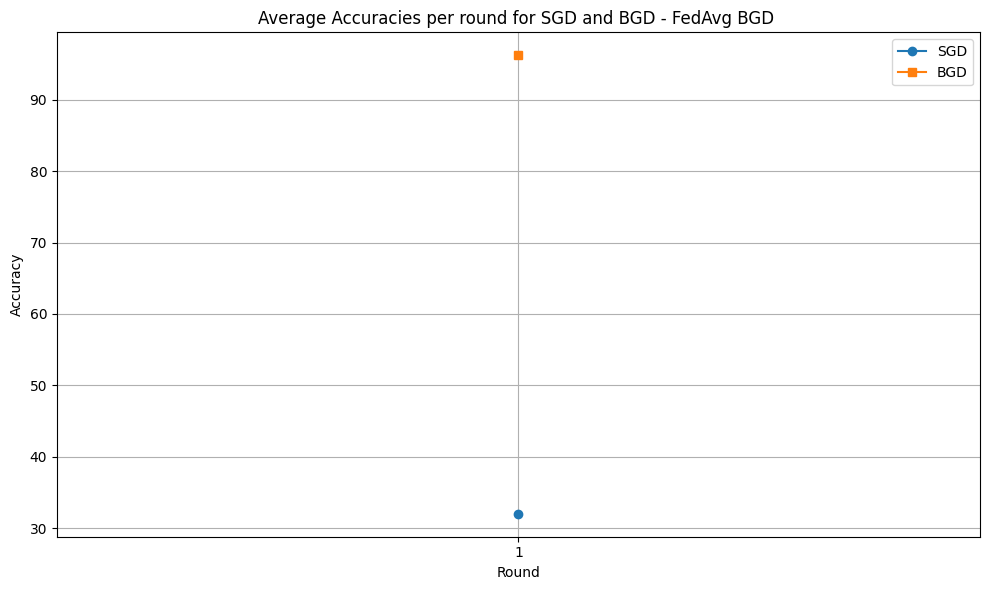

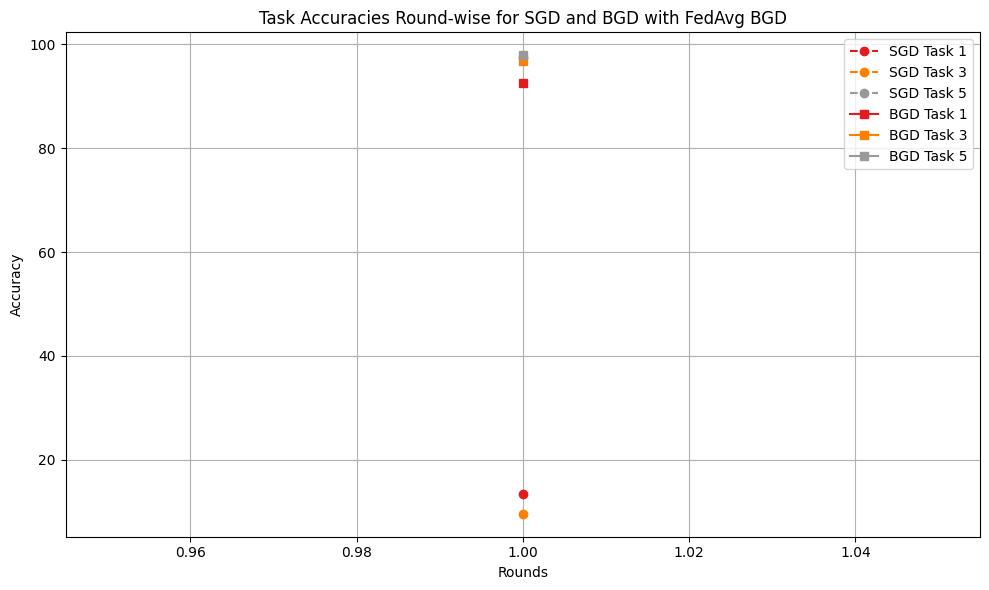

sgd_avg_acc_after_last_task 32.03
bgd_avg_acc_after_last_task 96.21


/home/shivakanth/miniconda3/envs/my_new_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shivakanth/miniconda3/envs/my_new_env/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(nan, nan)

In [4]:
Vanilla_tasks_5_bgd_sgd = {'bgd' : [[92.57, 95.97, 96.8, 97.8, 97.92]],
                           'sgd' : [[13.41, 11.04, 9.55, 28.49, 97.64]]}


plot_average_accuracies_over_rounds(Vanilla_tasks_5_bgd_sgd['sgd'], Vanilla_tasks_5_bgd_sgd['bgd'])
plot_task_accuracies_roundwise(Vanilla_tasks_5_bgd_sgd['sgd'], Vanilla_tasks_5_bgd_sgd['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(Vanilla_tasks_5_bgd_sgd['sgd'], Vanilla_tasks_5_bgd_sgd['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting  

Vanilla_sgd_n_bgd(centralised)

Accuracies after 5 tasks 

sgd: [13.41, 11.04, 9.55, 28.49, 97.64]
bgd: [92.57, 95.97, 96.8, 97.8, 97.92]

Averge accuracies

sgd: 32.03
bgd: 96.21